In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [6]:
# Loading the data into the dataframe
df = pd.read_csv('globalterrorism.csv', encoding = 'latin-1')

C:\Users\priya\AppData\Local\Temp\ipykernel_20728\2199073504.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorism.csv', encoding = 'latin-1')


In [7]:
#Viewing the first five rows of the dataframe
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.tail()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
# Total number of rows and columns in the dataset
df.shape

(181691, 135)

In [10]:
# Viewing the column names in a list 
list = df.columns.tolist()
print(list,sep =', ')

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [11]:
# Acquiring columns that are necessary for our analysis
df = df[['eventid','iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','success','suicide'
        ,'attacktype1_txt','targtype1_txt','target1','gname','motive','weaptype1_txt','nkill','nwound','propvalue']]

In [12]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,...,suicide,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nwound,propvalue
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,0,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [13]:
# Checking for null values
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
target1               638
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
propvalue          142702
dtype: int64

In [14]:
# Filling null values in killed and wound columns and added to get new column - Casualties
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['Casualties'] = df['nkill'] + df['nwound']

In [15]:
# Renaming the columns for ease of access
df.rename(columns={'eventid':'Eventid','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                  'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','success':'Success','suicide':
                  'Suicide','attacktype1_txt':'Attacktype','targtype1_txt':'Targtype','target1':'Target','gname':'Group','motive':
                  'Motive','weaptype1_txt':'Weapontype','nkill':'killed','nwound':'Wounded','propvalue':'Propvalue'},inplace = True)
df.head()

,Eventid,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,...,Attacktype,Targtype,Target,Group,Motive,Weapontype,killed,Wounded,Propvalue,Casualties
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [16]:
# Running EDD 
df.describe()

,Eventid,Year,Month,Day,Latitude,Longitude,Success,Suicide,killed,Wounded,Propvalue,Casualties
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,3.898900e+04,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.266860,2.883296,2.088119e+05,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.227057,34.309747,1.552463e+07,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,-9.900000e+01,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,1.000000e+03,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,2.700000e+09,9574.000000


In [17]:
print("Total number of casualities: ",int(sum(df['Casualties'].dropna())))

Total number of casualities:  935737


In [18]:
print("Total number of killed: ",int(sum(df['killed'].dropna())))

Total number of killed:  411868


In [19]:
print("Total number of wounded: ",int(sum(df['Wounded'].dropna())))

Total number of wounded:  523869


C:\Users\priya\AppData\Local\Temp\ipykernel_20728\3368786242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Year", data=df, palette="magma", edgecolor=sns.color_palette("dark", 10))


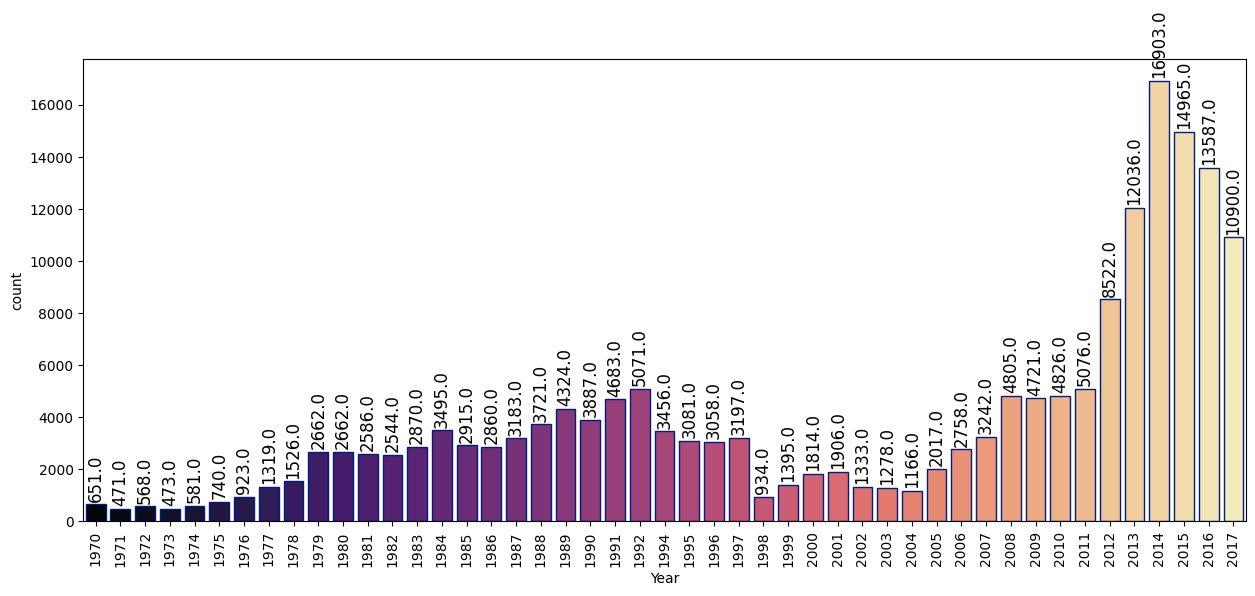

In [20]:
plt.subplots(figsize=(15, 6))
ax = sns.countplot(x="Year", data=df, palette="magma", edgecolor=sns.color_palette("dark", 10))
plt.xticks(rotation=90)

# Adding annotations to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points',rotation = 90)

plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_20728\2420127751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = cas_by_year['Year'], y =cas_by_year['Casualties'],palette = "flare",edgecolor = sns.color_palette('dark',10))


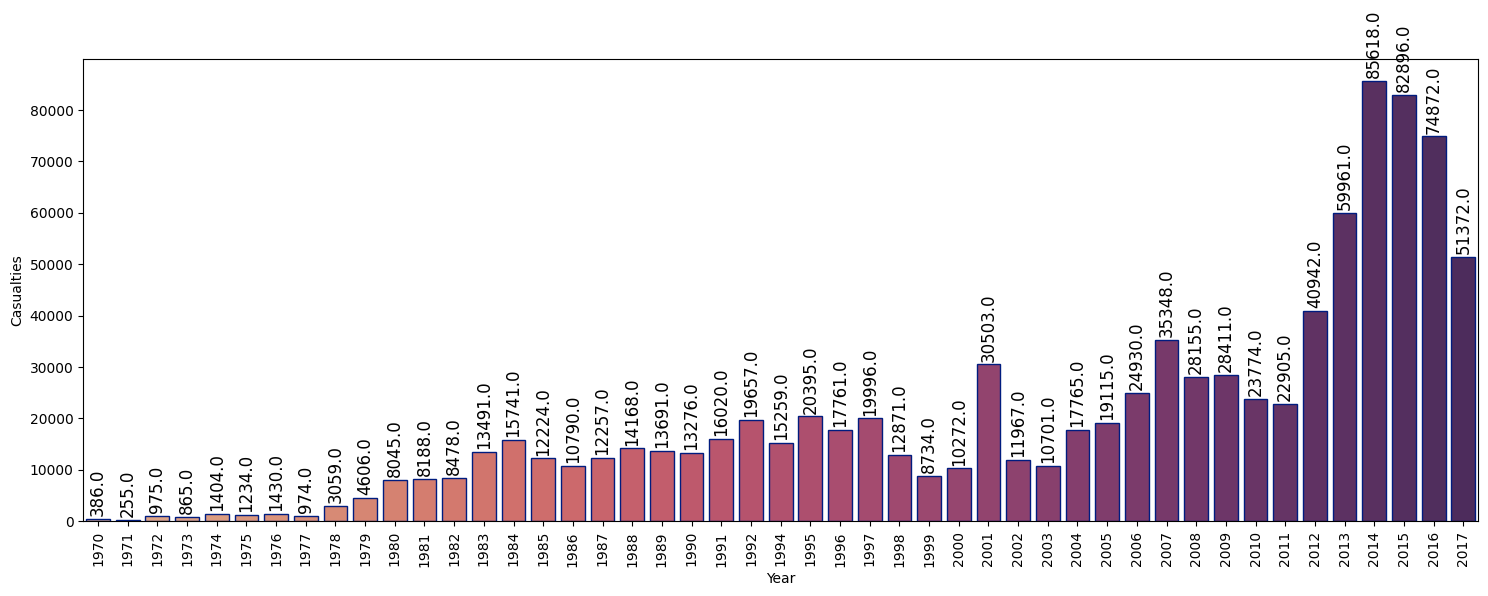

In [21]:
plt.subplots(figsize=(18,6))
cas_by_year = df.groupby('Year').Casualties.sum().to_frame().reset_index()
cas_by_year.columns = ['Year','Casualties']
ax = sns.barplot(x = cas_by_year['Year'], y =cas_by_year['Casualties'],palette = "flare",edgecolor = sns.color_palette('dark',10))
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points',rotation = 90)
plt.show()


C:\Users\priya\AppData\Local\Temp\ipykernel_20728\2474133056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_killed['Region'],y=region_killed['Total Killed'],palette ="mako")


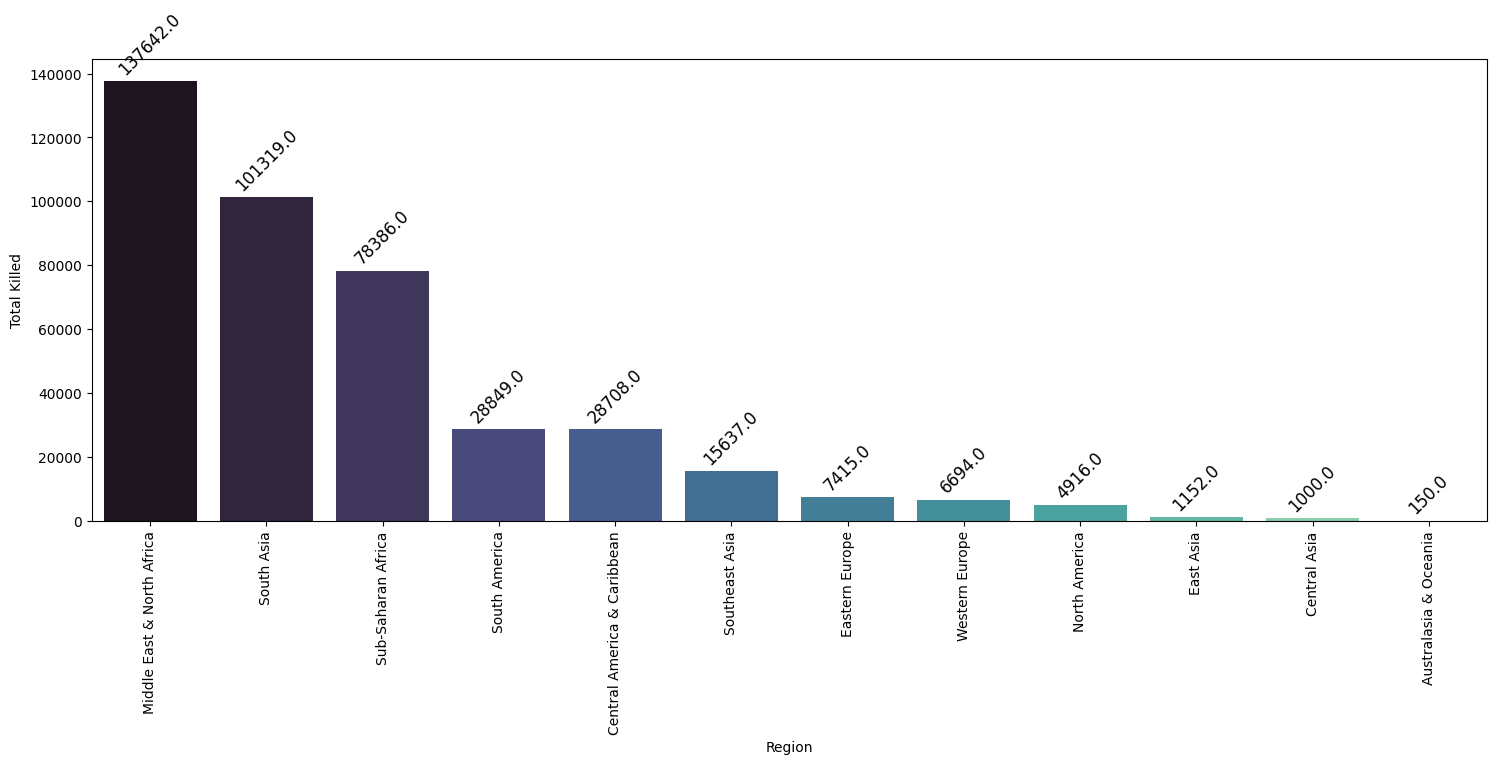

In [22]:
plt.subplots(figsize = (18,6))
region_killed = df.groupby('Region').killed.sum().to_frame().reset_index()
region_killed.columns =['Region','Total Killed']
region_killed = region_killed.sort_values('Total Killed', ascending=False)
ax = sns.barplot(x=region_killed['Region'],y=region_killed['Total Killed'],palette ="mako")
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points',rotation = 45)

plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_20728\3084716702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = country_killed.Country, y= country_killed.killed, palette = "GnBu_r",edgecolor = sns.color_palette('dark',10))


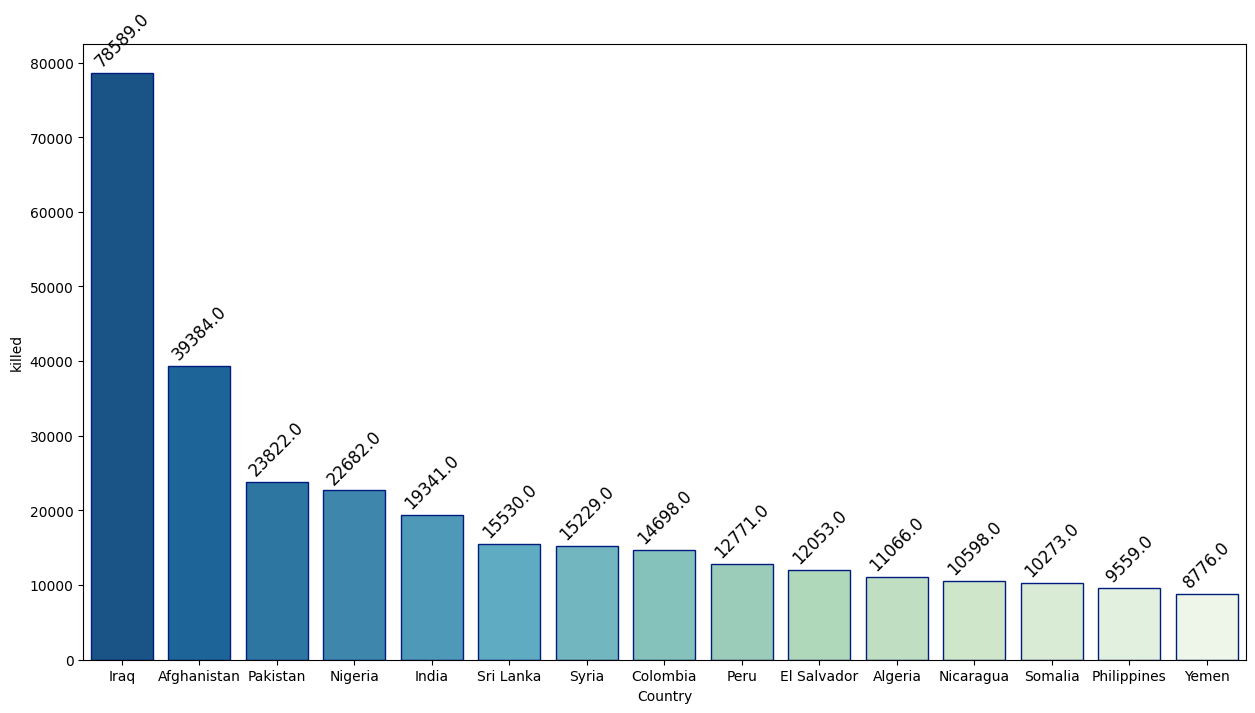

In [23]:
plt.subplots(figsize = (15,8))
country_killed = df.groupby('Country').killed.sum().to_frame().reset_index().sort_values('killed',ascending = False)[:15]
ax = sns.barplot(x = country_killed.Country, y= country_killed.killed, palette = "GnBu_r",edgecolor = sns.color_palette('dark',10))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points',rotation = 45)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

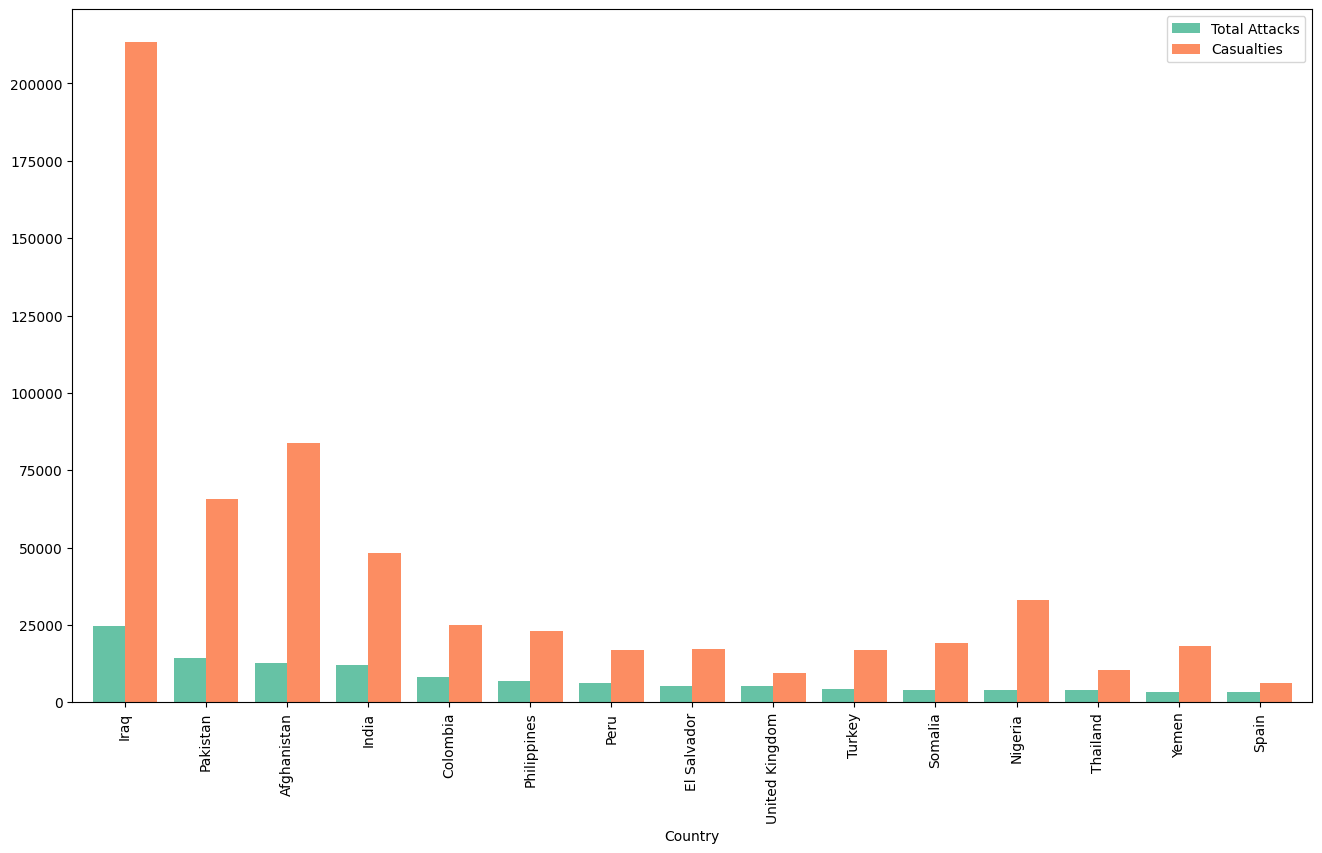

In [24]:
country_att = df.Country.value_counts()[:15].to_frame().reset_index()
country_att.columns = ['Country','Total Attacks']
country_cas = df.groupby('Country').Casualties.sum().to_frame().reset_index()
country_cas.columns = ['Country','Casualties']
country_total = pd.merge(country_att,country_cas,how='left',on = 'Country').sort_values('Total Attacks',ascending = False)
sns.set_palette('Set2')
country_total.plot.bar(x="Country",width=0.8)
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

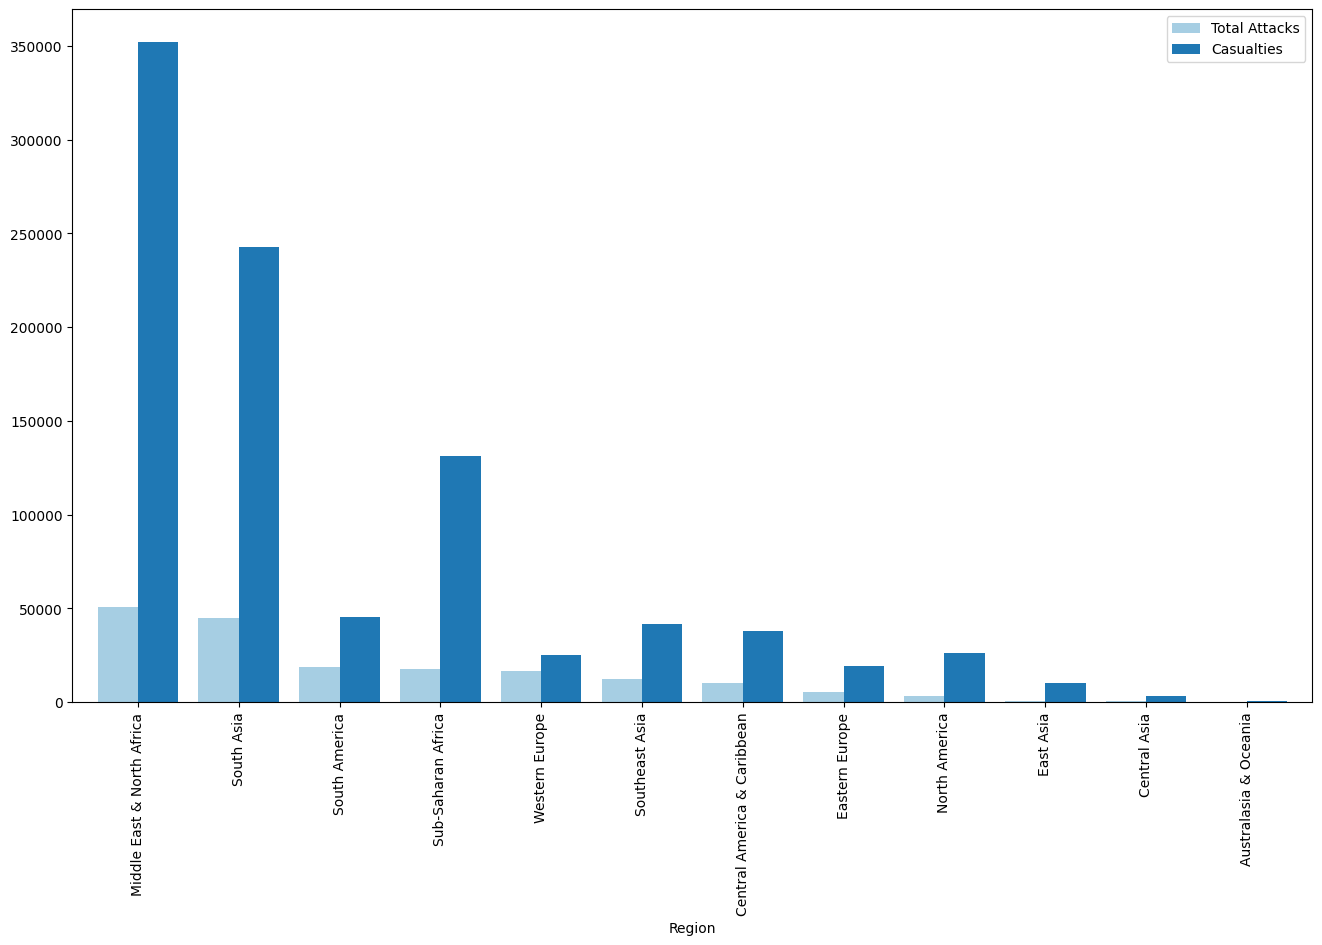

In [25]:
region_att = df.Region.value_counts()[:15].to_frame().reset_index()
region_att.columns = ['Region','Total Attacks']
region_cas = df.groupby('Region').Casualties.sum().to_frame().reset_index()
region_cas.columns = ['Region','Casualties']
region_total = pd.merge(region_att,region_cas,how='left',on = 'Region').sort_values('Total Attacks',ascending = False)
sns.set_palette('Paired')
region_total.plot.bar(x="Region",width=0.8)
plt.xticks(rotation = 90)
plt.title = ("Total Attacks vs Casualties by Region")
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show

C:\Users\priya\AppData\Local\Temp\ipykernel_20728\2479260720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = group_attacks['Terrorist Group'],x = group_attacks['Total Attacks'],palette = "mako",edgecolor = sns.color_palette('dark',10))


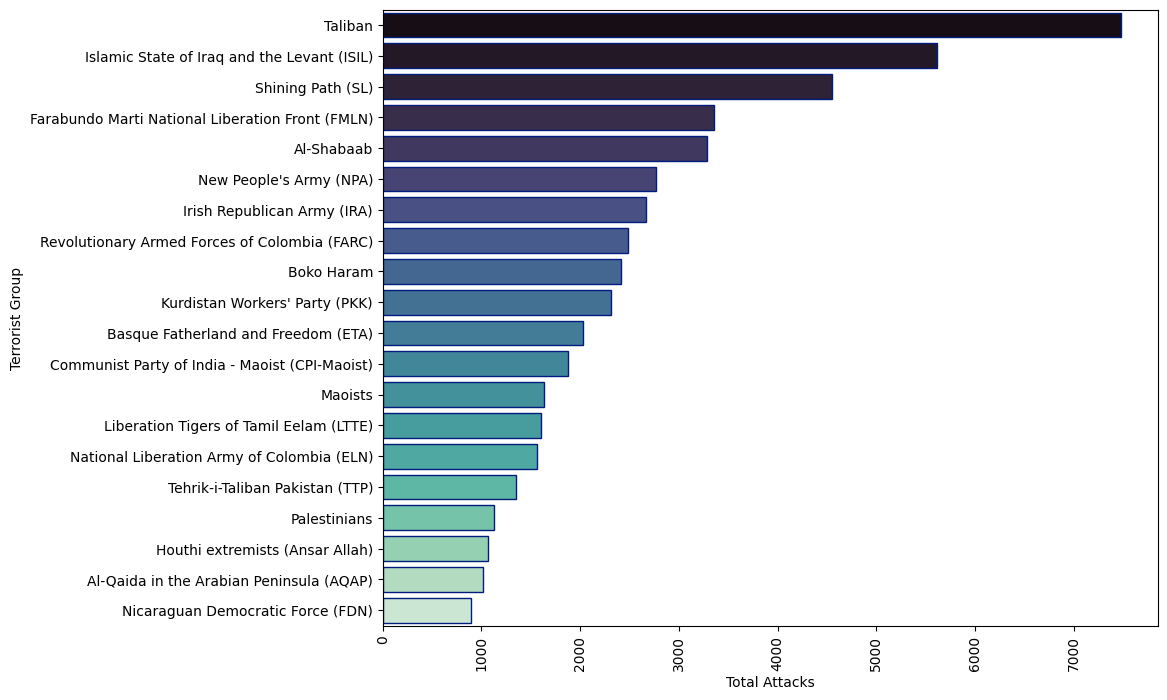

In [26]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:20]
group_attacks.columns = ['Terrorist Group','Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y = group_attacks['Terrorist Group'],x = group_attacks['Total Attacks'],palette = "mako",edgecolor = sns.color_palette('dark',10))
plt.xticks(rotation = 90)

plt.show()

In [ ]:
df = df[df['Group'] != 'Unknown']
grouped_df = df.groupby(['Group', 'Weapontype'])['killed'].sum().reset_index()
top_10_groups = grouped_df.groupby('Group')['killed'].sum().nlargest(10).index
filtered_df = grouped_df[grouped_df['Group'].isin(top_10_groups)]
fig = px.sunburst(filtered_df, path=['Group', 'Weapontype'], values='killed', title='Top 10 Groups and Their Weapon Types with Total Kills')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(width=1000, height=900)
fig.show()